In [25]:
import pandas as pd
import numpy as np
from scipy.stats import *
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import os
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv("greenhouse.csv")
df.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [6]:
df.rename({"country_or_area": "country"}, axis=1, inplace=True)

df.columns

Index(['country', 'year', 'value', 'category'], dtype='object')

In [7]:
le = LabelEncoder()

df["country_encoded"] = le.fit_transform(df["country"])

In [13]:
X = df.drop(["country", "category", "country_encoded", "year"], axis=1)
y = df["country_encoded"].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
model = KNeighborsClassifier(n_neighbors=2)

model.fit(X_train, Y_train)
pred = model.predict(X_test)

print ("==== ACCURACY ====")
print ("{} % ".format(accuracy_score(Y_test, pred) * 100))



==== ACCURACY ====
21.521997621878715 % 


/Users/thomasnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


/Users/thomasnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


AttributeError: 'DataFrame' object has no attribute 'plots'

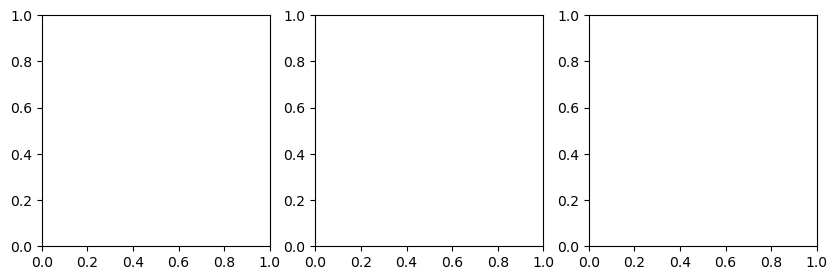

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
 # the fit method returns the object self, so we can instantiate
 # and fit in one line
 clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
 df.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
 df.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{} neighbor(s)".format(n_neighbors))
 ax.set_xlabel("feature 0")
 ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [19]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
df.columns

Index(['country', 'year', 'value', 'category', 'country_encoded'], dtype='object')

/Users/thomasnguyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

In [22]:
df.head()

,country,year,value,category,country_encoded
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...,0
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...,0
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...,0
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...,0
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...,0


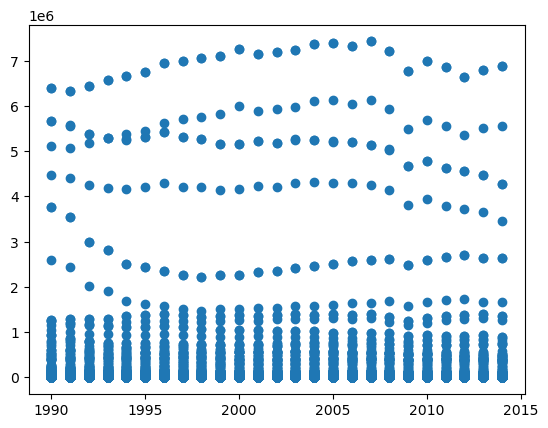

In [24]:
plt.scatter(df.year, df.value)

In [26]:
df.columns

Index(['country', 'year', 'value', 'category', 'country_encoded'], dtype='object')

In [28]:
X = df.drop(["country", "country_encoded", "category", "year"], axis=1)
y = df["country"].values.reshape(-1, 1)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

ValueError: Unknown label type: 'continuous'